# Data preparation and customer analytics

## Author: Piyush Kumar

#### Description of some random variables

LIFESTAGE: 
Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: 
Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.


In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## EDA - QVI Transaction data

In [2]:
# Reading the csv
path = 'Quantium and Forage Virtual Exp Prog/QVI_transaction_data.xlsx'
df = pd.read_excel(path)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Getting to know the data

In [3]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


All the random variables seems to have correct type.

In [4]:
# Checking for null values
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

No null values are present in the dataset

In [5]:
# Number of unique values in store number
df['STORE_NBR'].value_counts()

226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
252       2
206       2
92        1
76        1
Name: STORE_NBR, Length: 272, dtype: int64

In [6]:
# Total number of store number values - not unique
df['STORE_NBR'].describe()

count    264836.00000
mean        135.08011
std          76.78418
min           1.00000
25%          70.00000
50%         130.00000
75%         203.00000
max         272.00000
Name: STORE_NBR, dtype: float64

In [7]:
# Number of unique values in PROD_QTY
df['PROD_QTY'].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

## Finding Outliers

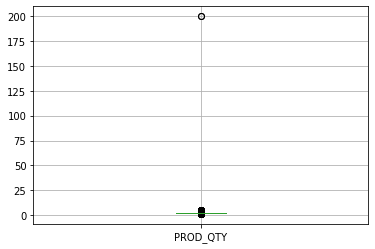

In [8]:
# Visualizing PROD_QTY on a box plot for finding outliers

figure = df.boxplot(column='PROD_QTY', grid=True)

We can see from the above boxplot that there is an outlier in "PROD_QTY" column of the dataset

In [9]:
# Description of sales
df['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

The difference between the 3rd Quantile value and the max is huge so there is a possibility of outliers present in the column

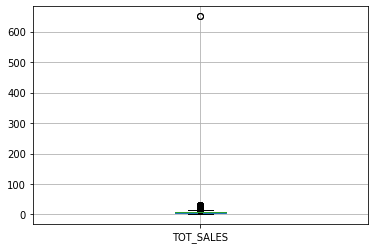

In [10]:
# Visualizing TOT_SALES on a box plot for finding outliers

figure = df.boxplot(column='TOT_SALES', grid=True)

We can see from the above boxplot that there is an outlier in "TOT_SALES" column of the dataset

In [11]:
df['LYLTY_CARD_NBR'].unique()

array([  1000,   1307,   1343, ..., 272358, 272379, 272380], dtype=int64)

In [12]:
df['LYLTY_CARD_NBR'].value_counts()

172032    18
162039    18
230078    17
128178    17
13138     17
          ..
22190      1
22138      1
22099      1
22089      1
272380     1
Name: LYLTY_CARD_NBR, Length: 72637, dtype: int64

In [13]:
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

The unique card numbers are more than the number of unique products avilable. This implies that the number of customers are way more than the number of products which means that a single customer is buying more than one brand of chips.

In [14]:
mod_df = df.copy()
mod_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Deriving Features: BRD_NAME and PACK_SIZE

In [15]:
mod_df['PACK_SZ'] = mod_df['PROD_NAME'].str[-4:]
mod_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [16]:
mod_df['PACK_SIZE'] = mod_df['PACK_SZ'].str[-4:-1]
mod_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,150


In [17]:
mod_df.drop(columns= 'PACK_SZ', axis=1, inplace=True)
mod_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [18]:
mod_df['PACK_SIZE'].describe()

count     264836
unique        21
top          175
freq       66390
Name: PACK_SIZE, dtype: object

In [20]:
# Deriving new feature 'BRD_NAME' or BRAND NAME
mod_df['BRD_NAME'] = mod_df['PROD_NAME'].str[0:-4] 
mod_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRD_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho Cheese
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip Thinly S/Cream&Onion
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili


## Handling 'sal' string in "PACK_SIZE" using referance link: "https://datatofish.com/string-to-integer-dataframe/"
## Converting 'PACK_SIZE' to numeric data

In [21]:
# Handling 'sal' string in "PACK_SIZE" using referance link: https://datatofish.com/string-to-integer-dataframe/
# Converting 'PACK_SIZE' to numeric data

mod_df['PACK_SIZE'] = pd.to_numeric(mod_df['PACK_SIZE'], errors='coerce')

In [22]:
# 'sal' converted to NAN
mod_df[65:68]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRD_NAME
65,43605,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,NaN,Kettle 135g Swt Pot Sea
66,43599,83,83062,82438,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles SourCream Onion
67,43328,83,83186,83162,4,Dorito Corn Chp Supreme 380g,2,6.5,380.0,Dorito Corn Chp Supreme


As we can see above that for 65th record PROD_NAME is having pack size in between the name. We need to handle that as well



In [25]:
mod_df.loc[65,['PROD_NAME']] = 'Kettle Swt Pot Sea Salt'
mod_df.loc[65,['BRD_NAME']] = 'Kettle Swt Pot Sea Salt'
mod_df.loc[65,['PACK_SIZE']] = 135

In [26]:
mod_df.loc[65] 

DATE                                43605
STORE_NBR                              83
LYLTY_CARD_NBR                      83008
TXN_ID                              82099
PROD_NBR                               63
PROD_NAME         Kettle Swt Pot Sea Salt
PROD_QTY                                2
TOT_SALES                             8.4
PACK_SIZE                           135.0
BRD_NAME          Kettle Swt Pot Sea Salt
Name: 65, dtype: object

In [27]:
mod_df['PACK_SIZE'].isnull().sum()

3256

In [28]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   PACK_SIZE       261580 non-null  float64
 9   BRD_NAME        264836 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 20.2+ MB


## Dealing with outliers

### 1. Pack Size

In [39]:
mod_df['PACK_SIZE'].describe()

count    261580.000000
mean        183.017348
std          64.506967
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

<AxesSubplot:>

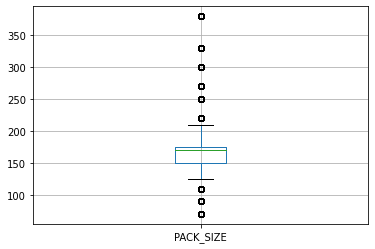

In [33]:
mod_df.boxplot(column = 'PACK_SIZE')

d:\styles\programming\jupyter\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PACK_SIZE', ylabel='Density'>

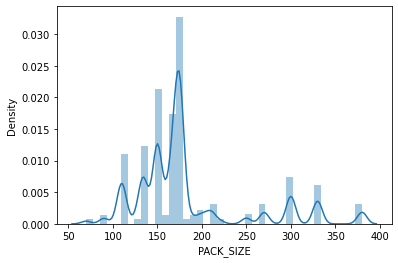

In [38]:
sns.distplot(mod_df['PACK_SIZE'] ,kde=True, bins=40)

Handeling outliers using 3rd std deviation method. Any value >= 3*std of the distribution will be considered as an outlier

Text(0, 0.5, 'No. of packets')

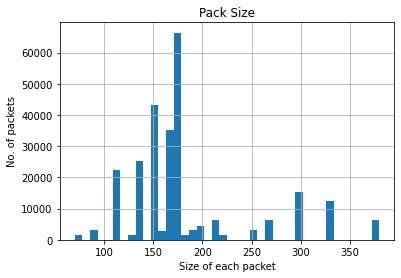

In [40]:
fig = mod_df.PACK_SIZE.hist(bins=40)
fig.set_title('Pack Size')
fig.set_xlabel('Size of each packet')
fig.set_ylabel('No. of packets')

Somewhat Gaussian destribution

In [42]:
# Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundary = mod_df['PACK_SIZE'].mean() + 3*mod_df['PACK_SIZE'].std()
lower_boundary = mod_df['PACK_SIZE'].mean() - 3*mod_df['PACK_SIZE'].std()
print(mod_df['PACK_SIZE'].mean())
print(upper_boundary)
print(lower_boundary)

183.0173484211331
376.5382508017631
-10.503553959496912


As packet size cannot be negative we will ignore the lower boundary. And we'll consider every data point >=376g as an outliar

In [43]:
mod_df.loc[mod_df['PACK_SIZE']>=376,'PACK_SIZE']=376

In [44]:
mod_df['PACK_SIZE'].max()

376.0

Text(0, 0.5, 'No. of packets')

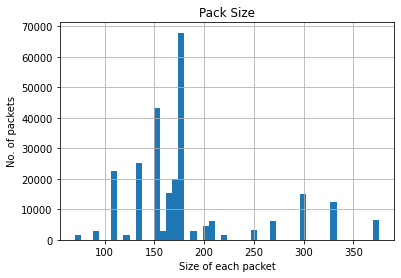

In [46]:
fig = mod_df.PACK_SIZE.hist(bins=50)
fig.set_title('Pack Size')
fig.set_xlabel('Size of each packet')
fig.set_ylabel('No. of packets')

d:\styles\programming\jupyter\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PACK_SIZE', ylabel='Density'>

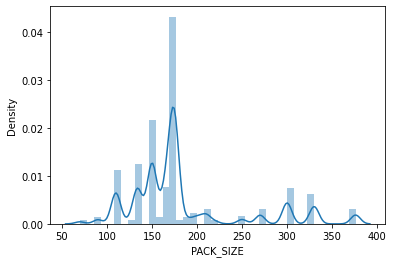

In [48]:
sns.distplot(mod_df['PACK_SIZE'] ,kde=True, bins=40)

### 2. Product Quantity

In [50]:
mod_df['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [51]:
mod_df['PROD_QTY'].unique()

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [52]:
mod_df['PROD_QTY'].median()

2.0

As we can see that there is only one outlier. We can replace it with the median of the destribution.

In [74]:
mod_df.loc[mod_df['PROD_QTY']>5, 'PROD_QTY']=2
mod_df['PROD_QTY'].max()

5

### 3. Total Sales

Text(0, 0.5, 'No. of purchases using same amount')

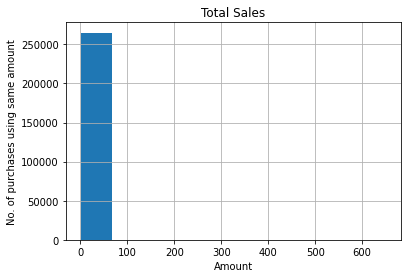

In [60]:
fig2=mod_df.TOT_SALES.hist(bins=10)
fig2.set_title('Total Sales')
fig2.set_xlabel('Amount')
fig2.set_ylabel('No. of purchases using same amount')

d:\styles\programming\jupyter\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOT_SALES', ylabel='Density'>

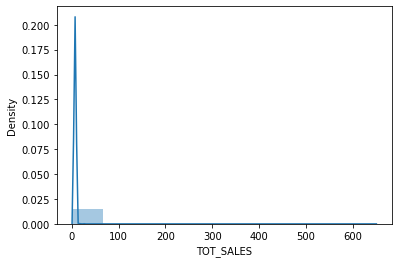

In [61]:
sns.distplot(mod_df['TOT_SALES'], kde=True, bins=10)

In [62]:
mod_df['TOT_SALES'].describe()

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

We can see a huge difference between the 75% value and the max value. Possibility of an outlier.

<AxesSubplot:>

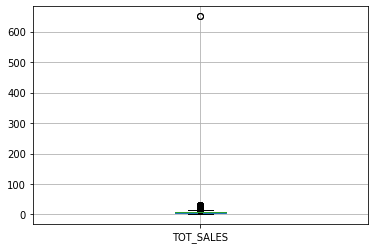

In [63]:
mod_df.boxplot(column='TOT_SALES')

As destribution for total sales is somewhat right skewed. We can use IQR method to find the outliers. 

In [64]:
# Lets compute the Interquantile range to calculate the boundaries
IQR = mod_df.TOT_SALES.quantile(0.75) - mod_df.TOT_SALES.quantile(0.25)
IQR

3.799999999999999

In [65]:
lower_bridge = mod_df.TOT_SALES.quantile(0.75)-(1.5*IQR)
higher_bridge = mod_df.TOT_SALES.quantile(0.75)+(1.5*IQR)
print(lower_bridge)
print(higher_bridge)
print(IQR)

3.500000000000001
14.899999999999999
3.799999999999999


In [66]:
# extreme outliers
lower_bridge = mod_df.TOT_SALES.quantile(0.75)-(3*IQR)
higher_bridge = mod_df.TOT_SALES.quantile(0.75)+(3*IQR)
print(lower_bridge)
print(higher_bridge)
print(IQR)

-2.1999999999999975
20.599999999999994
3.799999999999999


Considering extreme outliers and neglecting the negative lower bridge value as sales can not be negative

In [69]:
# Handling outliers

mod_df.loc[mod_df['TOT_SALES']>20]=20
mod_df['TOT_SALES'].max()

20.0

<AxesSubplot:>

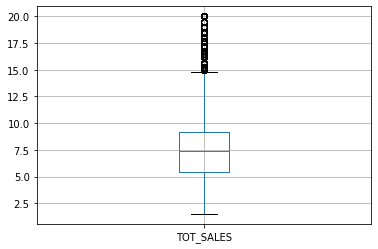

In [70]:
mod_df.boxplot(column='TOT_SALES')

<AxesSubplot:>

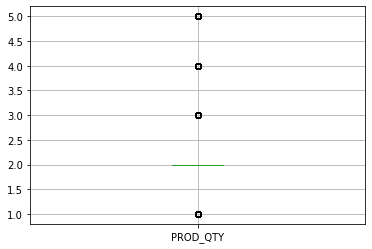

In [76]:
mod_df.boxplot(column='PROD_QTY')

## Dealing with NULL Values

<AxesSubplot:>

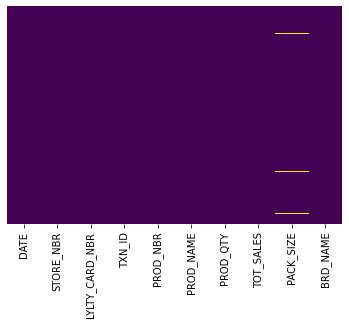

In [77]:
sns.heatmap(mod_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As We can see that we only have null values in PACK_SIZE column of our dataset

In [78]:
mod_df['PACK_SIZE'].describe()

count    261584.000000
mean        182.734984
std          64.333778
min          20.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         376.000000
Name: PACK_SIZE, dtype: float64

In [86]:
mod_df['PACK_SIZE'] = mod_df['PACK_SIZE'].fillna(170)

In [87]:
mod_df['PACK_SIZE'].isnull().sum()

0

<AxesSubplot:>

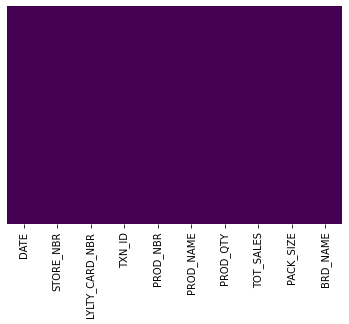

In [88]:
sns.heatmap(mod_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we can see that there are no null values in our dataset

## Overview of the dataset after some data pre-processing and feature engineering

In [89]:
mod_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRD_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Compny SeaSalt
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs Nacho Cheese
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths Crinkle Cut Chips Chicken
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths Chip Thinly S/Cream&Onion
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle Tortilla ChpsHny&Jlpno Chili
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300.0,Old El Paso Salsa Dip Tomato Mild
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths Crinkle Chips Salt & Vinegar
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0,Grain Waves Sweet Chilli
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0,Doritos Corn Chip Mexican Jalapeno
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0,Grain Waves Sour Cream&Chives


In [90]:
mod_df.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRD_NAME
264826,43549,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110.0,Cobs Popd Sea Salt Chips
264827,43340,272,272197,269911,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions Thai SweetChili PotatoMix
264828,43308,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4,134.0,Pringles Chicken Salt Crips
264829,43540,272,272236,269976,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,110.0,Infuzions SourCream&Herbs Veg Strws
264830,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175.0,Thins Chips Light& Tangy
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle Sweet Chilli And Sour Cream
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos Splash Of Lime
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos Mexicana
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos Corn Chip Mexican Jalapeno
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8,175.0,Tostitos Splash Of Lime


In [91]:
mod_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264836.000000,264836.000000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,43426.641748,134.976325,1.354283e+05,1.350374e+05,56.554294,1.903533,7.296324,182.578607
std,1278.501843,76.827631,8.064873e+04,7.820212e+04,32.829165,0.333511,2.508395,63.952950
min,20.000000,1.000000,2.000000e+01,1.000000e+00,1.000000,1.000000,1.500000,20.000000
25%,43373.000000,69.000000,6.925075e+04,6.741675e+04,28.000000,2.000000,5.400000,150.000000
50%,43464.000000,130.000000,1.303265e+05,1.350145e+05,56.000000,2.000000,7.400000,170.000000
75%,43555.000000,203.000000,2.030800e+05,2.026382e+05,85.000000,2.000000,9.200000,175.000000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,20.000000,376.000000


In [92]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
 8   PACK_SIZE       264836 non-null  float64
 9   BRD_NAME        264836 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 20.2+ MB


In [94]:
mod_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRD_NAME          0
dtype: int64

## Saving into csv file

In [96]:
mod_df.to_csv('Processed_Customer_Analytics.csv')

In [97]:
mod_df.to_excel('Processed_Customer_Analytics.xlsx')